In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

from konlpy.tag import Okt

from functools import reduce

from wordcloud import WordCloud

In [2]:
DATA_IN_PATH = './'

In [3]:
data = pd.read_csv(DATA_IN_PATH + 'tot.csv', encoding='utf-8')

In [4]:
data

,data,label
0,Game Designer(게임 디자이너)\n\n비디오 게임 제작자의 부류. 영어로는...,game
1,"게임크리에이터, 게임디자이너\n게임기획자는 PC 게임, 네트워크 게임 등 게임용 소...",game
2,"게임기획자란?\n실제 게임제작, 게임프로그래밍이나 그래픽 작업에 들어가기 전 어떤 ...",game
3,"하는일\n컴퓨터 게임의 아이템과 스토리, 캐릭터 등을 구성 및 기획하고 제작 과정을...",game
4,게임기획자\n\n게임 기획자는 게임 회사의 기획팀에 속해서 일하는 사람들을 말합니다...,game
...,...,...
118,안녕하세요. 자기소개 부탁드립니다.\n안녕하세요! 개발자 고영정이라고 합니다. 토스...,mobile
119,버즈빌에 대한 간단한 소개도 부탁드립니다.\n버즈빌은 글로벌 잠금 화면 광고 플랫폼...,mobile
120,반갑습니다. 자기소개 부탁 드립니다.\n안녕하세요. 캐시슬라이드에서 제품길드의 클라...,mobile
121,안녕하세요. 간단한 자기소개 부탁 드립니다.\n안녕하세요! 와이즈솔루션 테크니컬 파...,mobile


In [5]:
sentences = list(data['data'])

In [6]:
sentences

["Game Designer(게임 디자이너)\n\n비디오 게임 제작자의 부류. 영어로는 '게임 디자이너'라고도 한다. 외래어 '디자인'은 본래 '설계', '계획'이다. 그래픽 담당 직군은 '그래픽 아트', 사운드까지 포함하는 더 넓은 의미에서는 '아트 디자인'이라고 하는 경우도 있다.\n\n게임은 다양한 분야의 영역들이 믹스된 영화의 영역에서 보다 진보된 현대적 프러덕션이라고도 할수있다. 그래픽, 음악, 연기, 스토리, 촬영, 컴퓨터 사이언스, 경제등 다양한 영역이 필요에 따라 게임에 반영된다. 이러한 영역들이 서로 잘 섞여 게임이라는 결과물로 바뀌도록 관리해나가는 사람이 기획자다. 기획자에게 요구되는 역량은 게임마다 달라진다. 기본적으로 프로젝트 관리 역량을 갖추어야 하며, 추가적으로 개발할 게임에 필요한 능력 전반에 대해 알아야 한다.\n시스템: 게임에 기반이 되는 시스템 및 프로그램적으로 개발되는 요소를 책임진다. 프로그래밍 관련 지식이 필요하다.\n시나리오: 게임에 기반이 되는 스토리, 캐릭터, 퀘스트 등 text와 등장할 캐릭터요소를 책임진다. 문화 예술 관련 지식이 필요하다.\n레벨 디자인: 게임에 기반이 되는 맵에 사이즈, 배치요소를 담당한다. 건축과 크기에 따른 공간적 지식과 플레이타임 등을 계산할 게임적 지식이 필요하다.\n운영: 게임내 운영 업무로 기획한 내용에 반영 되었을때 운영에 관련 내용을 담당한다. 라이브 기획자가 주로 다른 기획업무와 병행하는 업무이다.\n밸런싱: 게임에 수치들을 담당하며, 데이터와 수학지식, 게임룰에 따른 수치화에 대한 통찰력이 필요한다.\n게임 내 경제: 게임 내 경제를 시뮬레이션 할 능력과 지식이 필요하다. 게임 내 몬스터 드랍, 획득 게임머니 등 요소를 담당한다.",
 '게임크리에이터, 게임디자이너\n게임기획자는 PC 게임, 네트워크 게임 등 게임용 소프트웨어 제작과 관련된 모든 사항들을 총괄적으로 지휘하고 감독하는 일을 담당한다.\n게임 시장 조사 등을 통해 소비자들이 좋아하고 원하는 게임이 무엇인지를 파악하

In [63]:
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]


okt = Okt()

morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

In [64]:
tokenized_sentences

[['Game',
  'Designer(게임',
  '디자이너)',
  '비디오',
  '게임',
  '제작자의',
  '부류.',
  '영어로는',
  "'게임",
  "디자이너'라고도",
  '한다.',
  '외래어',
  "'디자인'은",
  '본래',
  "'설계',",
  "'계획'이다.",
  '그래픽',
  '담당',
  '직군은',
  "'그래픽",
  "아트',",
  '사운드까지',
  '포함하는',
  '더',
  '넓은',
  '의미에서는',
  "'아트",
  "디자인'이라고",
  '하는',
  '경우도',
  '있다.',
  '게임은',
  '다양한',
  '분야의',
  '영역들이',
  '믹스된',
  '영화의',
  '영역에서',
  '보다',
  '진보된',
  '현대적',
  '프러덕션이라고도',
  '할수있다.',
  '그래픽,',
  '음악,',
  '연기,',
  '스토리,',
  '촬영,',
  '컴퓨터',
  '사이언스,',
  '경제등',
  '다양한',
  '영역이',
  '필요에',
  '따라',
  '게임에',
  '반영된다.',
  '이러한',
  '영역들이',
  '서로',
  '잘',
  '섞여',
  '게임이라는',
  '결과물로',
  '바뀌도록',
  '관리해나가는',
  '사람이',
  '기획자다.',
  '기획자에게',
  '요구되는',
  '역량은',
  '게임마다',
  '달라진다.',
  '기본적으로',
  '프로젝트',
  '관리',
  '역량을',
  '갖추어야',
  '하며,',
  '추가적으로',
  '개발할',
  '게임에',
  '필요한',
  '능력',
  '전반에',
  '대해',
  '알아야',
  '한다.',
  '시스템:',
  '게임에',
  '기반이',
  '되는',
  '시스템',
  '및',
  '프로그램적으로',
  '개발되는',
  '요소를',
  '책임진다.',
  '프로그래밍',
  '관련',
  '지식이',
  '필요하다.',
  '시나리오:',
  '게

In [69]:
print('형태소 최대길이: {}'.format(np.max(sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_morph, 75)))

형태소 최대길이: 2797
형태소 최소길이: 57
형태소 평균길이: 637.77
형태소 길이 표준편차: 424.01
형태소 중간길이: 589.0
형태소 1/4 퍼센타일 길이: 337.5
형태소 3/4 퍼센타일 길이: 868.5


{'whiskers': [<matplotlib.lines.Line2D at 0x1c339748f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1c339748730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c339855580>],
 'medians': [<matplotlib.lines.Line2D at 0x1c3397489a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c3397e50d0>],
 'means': [<matplotlib.lines.Line2D at 0x1c3397e5af0>]}

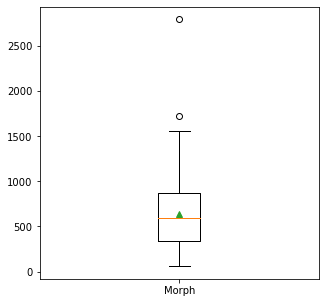

In [72]:
plt.figure(figsize=(5, 5))
plt.boxplot([sent_len_by_morph],
            labels=['Morph'], 
            showmeans=True)

In [74]:
label = list(data['label'])

C:\Users\user\anaconda3\envs\tf23\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

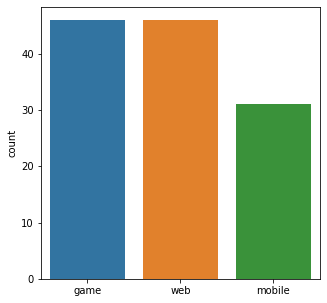

In [77]:
import seaborn as sns
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(5,5)
sns.countplot(label)